# CDS: Numerical Methods Assignments

- See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord.

- Solutions must be submitted via the Jupyter Hub.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

## Submission

1. Name all team members in the the cell below
2. make sure everything runs as expected
3. **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
4. **run all cells** (in the menubar, select Cell$\rightarrow$Run All)
5. Check all outputs (Out[\*]) for errors and **resolve them if necessary**
6. submit your solutions  **in time (before the deadline)**

## Discrete and Fast Fourier Transforms (DFT and FFT)

In the following we will implement a DFT algorithm and, based on that, a FFT algorithm. Our aim is to experience the drastic improvement of computational time in the FFT case.

In [23]:
import numpy as np
from matplotlib import pyplot as plt

### Task 1

Implement a Python function $\text{DFT(yk)}$ which returns the Fourier transform defined by

\begin{equation}
\beta_j = \sum^{N-1}_{k=0} f(x_k) e^{-ij x_k}
\end{equation}

with $x_k = \frac{2\pi k}{N}$ and $j = 0, 1, ..., N-1$. The $\text{yk}$ should represent the array corresponding to $y_k = f(x_k)$. Please note that this definition is slightly different to the one we introduced in the lecture. Here we follow the notation of Numpy and Scipy.

Hint: try to write the sum as a matrix-vector product and use $\text{numpy.dot()}$ to evaluate it.

In [63]:
def DFT(yk):
    len(yk)
    xk = 2*np.pi*np.arange(N)/N
    beta = yk * np.exp(np.dot(-np.arange(N), xk*1j).T)
    return beta

In [64]:
DFT(np.array([1,2,7,6,8]))

array([-1.-1.66661945e-12j, -2.-3.33323889e-12j, -7.-1.16663361e-11j,
       -6.-9.99971668e-12j, -8.-1.33329556e-11j])

### Task 2 

Make sure your function $\text{DFT(yk)}$ and Numpy’s FFT function $\text{numpy.fft.fft(yk)}$ return
the same data by plotting $|\beta_j|$ vs. $j$ for

\begin{equation}
    y_k = f(x_k) = e^{20i x_k} + e^{40 i x_k}
\end{equation}
and
\begin{equation}
    y_k = f(x_k) = e^{i 5 x_k^2}
\end{equation}

using $N = 128$ for both routines.

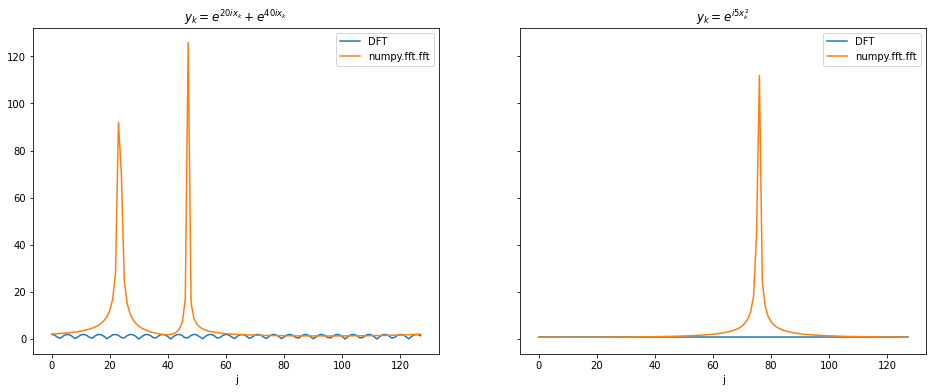

In [88]:
N   = 128

xk  = np.arange(N)
yk0 = np.exp(20j*xk) + np.exp(40j*xk)
yk1 = np.exp(5j*xk*2)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16,6))

ax[0].set_xlabel("j")
ax[1].set_xlabel("j")

ax[0].set_title("$y_k = e^{20ix_k} + e^{40ix_k}$")
ax[0].plot(np.abs(DFT(yk0)), label="DFT")
ax[0].plot(np.abs(np.fft.fft(yk0)), label="numpy.fft.fft")
ax[0].legend(loc="upper right")

ax[1].set_title("$y_k = e^{i5x^2_k}$")
ax[1].plot(np.abs(DFT(yk1)), label="DFT")
ax[1].plot(np.abs(np.fft.fft(yk1)), label="numpy.fft.fft")
ax[1].legend(loc="upper right")

fig.show()

### Task 3

Analyze the evaluation-time scaling of your $\text{DFT(yk)}$ function with the help of the timeit
module. Base your code on the following example:

```python
import timeit

tOut = timeit.repeat(stmt=lambda: DFT(yk), number=10, repeat=5)
tMean = np.mean(tOut)
```
This example evaluates $\text{DFT(yk)}$ 5 × 10 times and stores the resulting 5 evaluation times in tOut. Afterwards we calculate the mean value of these 5 repetitions. 
Use this example to calculate and plot the evaluation time of your $\text{DFT(yk)}$ function for $N = 2^2, 2^3, ..., 2^M$. Depending on your implementation you might be able to go up to $M = 10$. Be careful and increase M just step by step!

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Task 4

A very simple FFT algorithm can be derived by the following separation of the sum from
above:

\begin{align}
     \beta_j = \sum^{N-1}_{k=0} f(x_k) e^{-ij \frac{2\pi k}{N}} 
         &= \sum^{N/2 - 1}_{k=0} f(x_{2k}) e^{-ij \frac{2\pi 2k}{N}} 
          + \sum^{N/2 - 1}_{k=0} f(x_{2k+1}) e^{-ij \frac{2\pi (2k+1)}{N}}\\ 
         &= \sum^{N/2 - 1}_{k=0} f(x_{2k}) e^{-ij \frac{2\pi k}{N/2}}
          + \sum^{N/2 - 1}_{k=0} f(x_{2k+1}) e^{-ij \frac{2\pi k}{N/2}} e^{-ij \frac{2\pi}{N}}\\
         &= \beta^{\text{even}}_j + \beta^{\text{odd}}_j e^{-ij \frac{2\pi}{N}}
\end{align}

where $\beta^{\text{even}}_j$ is the Fourier transform based on only even $k$ (or $x_k$) and $\beta^{\text{odd}}_j$ the Fourier transform based on only odd $k$. In case $N = 2^M$ this even/odd separation can be done again and again in a recursive way. 

Use the template below to implement a $\text{FFT(yk)}$ function, making use of your $\text{DFT(yk)}$ function from above. Make sure that you get the same results as before by comparing the results from $\text{DFT(yk)}$
and $\text{FFT(yk)}$ for both functions defined in task 2.

```python
def FFT(yk):
    """Don't forget to write a docstring ...
    """
    N = # ... get the length of yk
    
    assert # ... check if N is a power of 2. Hint: use the % (modulo) operator
    
    if(N <= 2):
        return # ... call DFT with all yk points
    
    else:
        betaEven = # ... call FFT but using just even yk points
        betaOdd = # ... call FFT but using just odd yk points
        
        expTerms = np.exp(-1j * 2.0 * np.pi * np.arange(N) / N)
        
        # Remember : beta_j is periodic in j !
        betaEvenFull = np.concatenate([betaEven, betaEven])
        betaOddFull = np.concatenate([betaOdd, betaOdd])
        
        return betaEvenFull + expTerms * betaOddFull
```

In [ ]:
def FFT(yk):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Do your plotting here ...

# YOUR CODE HERE
raise NotImplementedError()

### Task 5

Analyze the evaluation-time scaling of your $\text{FFT(yk)}$ function with the help of the timeit module and compare it to the scaling of the $\text{DFT(yk)}$ function.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()